Initilize

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data pre-processing

In [61]:
df = pd.read_csv('Data/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [62]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [63]:
for column in df.columns:
    print(column)
    print('NaN: ', df[column].isna().sum())
    print('Null: ', df[column].isnull().sum())
    print('Dtype: ', df[column].dtypes)
    print('-'*20)

X
NaN:  0
Null:  0
Dtype:  int64
--------------------
Y
NaN:  0
Null:  0
Dtype:  int64
--------------------
month
NaN:  0
Null:  0
Dtype:  object
--------------------
day
NaN:  0
Null:  0
Dtype:  object
--------------------
FFMC
NaN:  0
Null:  0
Dtype:  float64
--------------------
DMC
NaN:  0
Null:  0
Dtype:  float64
--------------------
DC
NaN:  0
Null:  0
Dtype:  float64
--------------------
ISI
NaN:  0
Null:  0
Dtype:  float64
--------------------
temp
NaN:  0
Null:  0
Dtype:  float64
--------------------
RH
NaN:  0
Null:  0
Dtype:  int64
--------------------
wind
NaN:  0
Null:  0
Dtype:  float64
--------------------
rain
NaN:  0
Null:  0
Dtype:  float64
--------------------
area
NaN:  0
Null:  0
Dtype:  float64
--------------------


In [64]:
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [65]:
df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [66]:
def convert_month(month : str) -> int:
    
    # convert month to number ( 1 - 12)
    
    month_dict = {
        'jan' : 1,
        'feb' : 2,
        'mar' : 3,
        'apr' : 4,
        'may' : 5,
        'jun' : 6,
        'jul' : 7,
        'aug' : 8,
        'sep' : 9,
        'oct' : 10,
        'nov' : 11,
        'dec' : 12
    }
    return month_dict[month]

In [67]:
def convert_day (day : str) -> int:
    
    #Converts a day of the week from a string to an integer (0-6).
    
    day_dict = {
        'sun' : 0,
        'mon' : 1,
        'tue' : 2,
        'wed' : 3,
        'thu' : 4,
        'fri' : 5,
        'sat' : 6
    }
    return day_dict[day]

In [68]:
df['month'] = df['month'].apply(convert_month)

In [69]:
df['day'] = df['day'].apply(convert_day)

In [70]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [71]:
df.to_csv('Data/forestfires_cleaned.csv')

In [72]:
class LinearRegression:
    def fit(self , X : np.ndarray, Y : np.ndarray) -> None:
        cov = X.T @ X
        inv_cov = np.linalg.inv(cov)
        #self.theta_ : np.ndarray = np.matmul(int_cov, np.matmul(X.T,Y))
        self.theta_ : np.ndarray = inv_cov @ (X.T @ Y)
    
    def rmse(self, y : np.ndarray , y_hat : np.ndarray) -> float:
        delta = y - y_hat
        return (delta**2).mean()**0.5
    
    def predict (self, X: np.ndarray) -> np.ndarray:
        y_pred = np.matmul(self.theta_.T, X.T)
        return y_pred

Defining the input and output vector

In [73]:
X_y = df.to_numpy()

In [74]:
X_y.shape

(517, 13)

In [75]:
N = df.shape[0]
X_y_train , X_y_test = np.split (X_y, indices_or_sections=[int (0.8 * N)])

In [76]:
X_y_train

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 6.  ,  3.  ,  2.  , ...,  2.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  ,  2.  , ...,  9.4 ,  0.  ,  4.62],
       [ 9.  ,  4.  ,  7.  , ...,  4.5 ,  0.  ,  1.63]], shape=(413, 13))

In [77]:
X_y_test

array([[  7.  ,   5.  ,   8.  , ...,   3.6 ,   0.  ,   0.  ],
       [  5.  ,   4.  ,   8.  , ...,   4.  ,   0.  ,   0.  ],
       [  8.  ,   6.  ,   8.  , ...,   4.9 ,   0.  , 746.28],
       ...,
       [  7.  ,   4.  ,   8.  , ...,   6.7 ,   0.  ,  11.16],
       [  1.  ,   4.  ,   8.  , ...,   4.  ,   0.  ,   0.  ],
       [  6.  ,   3.  ,  11.  , ...,   4.5 ,   0.  ,   0.  ]],
      shape=(104, 13))

In [78]:
X_train = X_y_train[ : , :-1]
y_train = X_y_train[ : , -1]

X_test = X_y_test[ : , :-1]
y_test = X_y_test[ : , -1]

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)
Y_predict = lr.predict(X_test)

In [80]:
Y_predict

array([ 35.83533448,  18.77638492,  29.15051446,  20.42772457,
         4.30399383,  17.69543078,  17.71290125,  28.34795941,
        21.46622746,  30.34473004,  12.76723564,  37.00774935,
        24.87155093,  29.08571618,  22.32713839,  21.84437275,
        17.44227541,  35.0070586 ,  24.27524945,  25.63808205,
        11.681678  ,  29.4793817 ,  18.8738875 ,  26.34457096,
        24.03122918,  26.29371288,  10.84703558,  30.62393583,
        26.8939575 ,   1.64350708,  -1.45793103,  27.4750408 ,
         5.14389708,  13.26190352,  -2.21590458,  20.51549937,
        15.77832857,  14.28515218,   3.56352927,  19.41605223,
        26.27342985,  23.56957868,   2.90928601,  21.98031997,
        17.84493084,  27.51194135,  27.30368975,  22.25596369,
        27.51194135,  14.01154413,  -7.51184614,  -6.07146741,
         0.18369402,  -2.00320492,  -0.06652443,   6.50546421,
        -0.80442664,   0.56060002,  15.01441359,  11.0598342 ,
        20.74347409,  18.31221533,   8.21743226,  19.23

In [81]:
print(f'{lr.rmse(y_test, Y_predict):.20f}')

79.42477263962970823741


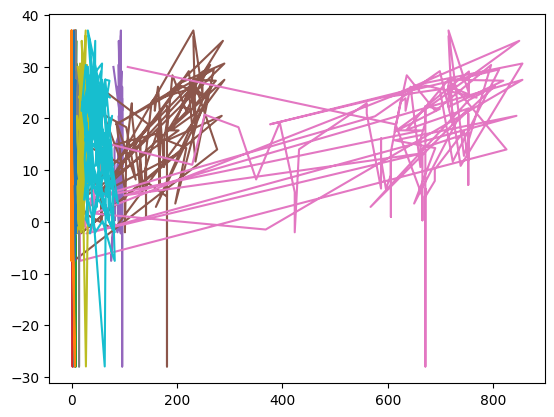

In [82]:
plt.plot(X_test, Y_predict.T)